In [59]:
pip install scrapy

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pwd

/home/ec2-user/SageMaker


In [2]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
!scrapy startproject gamesoflegends

New Scrapy project 'gamesoflegends', using template directory '/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/scrapy/templates/project', created in:
    /home/ec2-user/SageMaker/gamesoflegends

You can start your first spider with:
    cd gamesoflegends
    scrapy genspider example example.com


In [142]:
!ls

ELO_players.ipynb  esports-data    leagues.csv	new_leagues.csv
ELO_teams.ipynb    gamesoflegends  lost+found	Untitled.ipynb


In [9]:
os.chdir('..')

In [ ]:
!scrapy crawl srs -O series.json

In [3]:
def json_to_df(path):
    with open(path, 'r') as j:
        contents = json.loads(j.read())

    df = pd.json_normalize(contents)
    return df

In [4]:
games = json_to_df('gamesoflegends/games.json')

In [5]:
series = json_to_df('gamesoflegends/series.json')

In [6]:
games.sort_values(by =['date'], inplace =True)

In [156]:
games

,date,tournament_name,blue_side_team,blue_side_result,red_side_team,red_side_result,players_blue,players_red
140,2013-09-16,Season 3 World Championship,GamingGear,LOSS,Team SoloMid,WIN,"[Nbs, Alunir, Mazzerin, DeadlyBrother, Inspirro]","[Dyrus, TheOddOne, Reginald, WildTurtle, Xpecial]"
149,2013-09-16,Season 3 World Championship,Gambit Gaming,WIN,Samsung Ozone,LOSS,"[Darien, Diamondprox, Alex Ich, Genja, Voidle]","[Looper, DanDy, dade, imp, Mata]"
148,2013-09-16,Season 3 World Championship,Mineski,LOSS,Fnatic,WIN,"[Snoy, Kaigu, Yume, Exo, Tgee]","[sOAZ, Cyanide, xPeke, puszu, YellOwStaR]"
147,2013-09-16,Season 3 World Championship,Samsung Ozone,WIN,Team Vulcun,LOSS,"[Looper, DanDy, dade, imp, Mata]","[Sycho Sid, Xmithie, mancloud, Zuna, BloodWater]"
146,2013-09-16,Season 3 World Championship,Gambit Gaming,WIN,Mineski,LOSS,"[Darien, Diamondprox, Alex Ich, Genja, Voidle]","[Snoy, Kaigu, Yume, Exo, Tgee]"
...,...,...,...,...,...,...,...,...
46475,2023-09-09,VCS Summer Playoffs 2023,Team Whales,WIN,GAM Esports,LOSS,"[Sparda, BeanJ, Gloryy, Artemis, CBL]","[Kiaya, Levi, Kati, Slayder, Palette]"
46486,2023-09-10,LEC Season Finals 2023,G2 Esports,LOSS,Fnatic,WIN,"[Brokenblade, Yike, Caps, Hans sama, Mikyx]","[Wunder, Razork, Humanoid, Noah, Trymbi]"
46484,2023-09-10,LEC Season Finals 2023,G2 Esports,WIN,Fnatic,LOSS,"[Brokenblade, Yike, Caps, Hans sama, Mikyx]","[Wunder, Razork, Humanoid, Noah, Trymbi]"
46485,2023-09-10,LEC Season Finals 2023,Fnatic,LOSS,G2 Esports,WIN,"[Wunder, Razork, Humanoid, Noah, Trymbi]","[Brokenblade, Yike, Caps, Hans sama, Mikyx]"


In [42]:
df = series.rename_axis('index').sort_values(by = ['date', 'index'], ascending = [True, True])

In [8]:
tournaments = json_to_df('esports-data/tournaments.json')
tournaments2 = json_to_df('esports-data/tournaments_without_game_data.json')
players = json_to_df('esports-data/unfiltered_players.json')
#unfiltered_players = json_to_df('esports-data/unfiltered_players.json')
leagues = json_to_df('esports-data/leagues.json')
teams = json_to_df('esports-data/unfiltered_teams.json')
mapping_data = json_to_df('esports-data/mapping_data.json')
new_leagues = pd.read_csv('new_leagues.csv')
new_leagues = new_leagues.drop('Unnamed: 0', axis = 1)
tournaments = pd.concat([tournaments, tournaments2], ignore_index=True)
tournaments.sort_values(by =['startDate'], inplace =True)
players = players.drop_duplicates(subset=['player_id'])

In [44]:
slug = df['tournament_name'].str.split(' ')

In [45]:
slug = slug.to_frame()

In [46]:
slug['slug'] = 'NaN'

In [47]:
slug

,tournament_name,slug
index,,
140,"[Season, 3, World, Championship]",NaN
141,"[Season, 3, World, Championship]",NaN
142,"[Season, 3, World, Championship]",NaN
143,"[Season, 3, World, Championship]",NaN
144,"[Season, 3, World, Championship]",NaN
...,...,...
46491,"[LEC, Season, Finals, 2023]",NaN
46492,"[LEC, Season, Finals, 2023]",NaN
46493,"[LEC, Season, Finals, 2023]",NaN


In [48]:
for index, game in slug.iterrows():
    for word in game['tournament_name']:
        if word.lower() in new_leagues.values:
            slug.at[index,'slug'] = word.lower()
            break

In [49]:
slug.drop(slug[slug['slug'] == 'NaN'].index)

,tournament_name,slug
index,,
140,"[Season, 3, World, Championship]",world
141,"[Season, 3, World, Championship]",world
142,"[Season, 3, World, Championship]",world
143,"[Season, 3, World, Championship]",world
144,"[Season, 3, World, Championship]",world
...,...,...
46491,"[LEC, Season, Finals, 2023]",lec
46492,"[LEC, Season, Finals, 2023]",lec
46493,"[LEC, Season, Finals, 2023]",lec


In [50]:
df.insert(1, 'league', slug['slug'])

In [51]:
df = df.drop(df[df['league'] == 'NaN'].index)

In [52]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [53]:
df

,date,league,tournament_name,blue_side_team,red_side_team,blue_side_wins,n_games,players_blue,players_red,year,month
index,,,,,,,,,,,
140,2013-09-16,world,Season 3 World Championship,GamingGear,Team SoloMid,0,1,"[Nbs, Alunir, Mazzerin, DeadlyBrother, Inspirro]","[Dyrus, TheOddOne, Reginald, WildTurtle, Xpecial]",2013,9
141,2013-09-16,world,Season 3 World Championship,SK Telecom T1,Lemondogs,1,1,"[Impact, bengi, Faker, Piglet, PoohManDu]","[Zorozero, dexter, Nukeduck, Tabzz, Mithy]",2013,9
142,2013-09-16,world,Season 3 World Championship,Team SoloMid,OMG,0,1,"[Dyrus, TheOddOne, Reginald, WildTurtle, Xpecial]","[Gogoing, LoveLing, Cool, San, bigpomelo]",2013,9
143,2013-09-16,world,Season 3 World Championship,Lemondogs,GamingGear,1,1,"[Zorozero, dexter, Nukeduck, Tabzz, Mithy]","[Nbs, Alunir, Mazzerin, DeadlyBrother, Inspirro]",2013,9
144,2013-09-16,world,Season 3 World Championship,OMG,SK Telecom T1,1,1,"[Gogoing, LoveLing, Cool, San, bigpomelo]","[Impact, bengi, Faker, Piglet, PoohManDu]",2013,9
...,...,...,...,...,...,...,...,...,...,...,...
46491,2023-09-09,lec,LEC Season Finals 2023,Fnatic,MAD Lions,3,5,"[Wunder, Razork, Humanoid, Noah, Trymbi]","[Chasy, Elyoya, Nisqy, Carzzy, Hylissang]",2023,9
46492,2023-09-10,lec,LEC Season Finals 2023,G2 Esports,Fnatic,3,4,"[Brokenblade, Yike, Caps, Hans sama, Mikyx]","[Wunder, Razork, Humanoid, Noah, Trymbi]",2023,9
46493,2023-09-10,lec,LEC Season Finals 2023,Fnatic,G2 Esports,1,4,"[Wunder, Razork, Humanoid, Noah, Trymbi]","[Brokenblade, Yike, Caps, Hans sama, Mikyx]",2023,9


In [60]:
ELO_players = pd.DataFrame(columns = ['handle', 'ELO'])
ELO_teams = pd.DataFrame(columns = ['name', 'ELO'])

In [20]:
def start_elo(player, league_slug, ELO_players, new_leagues):
    ELO = new_leagues.loc[new_leagues['slug'] == league_slug]['ELO'].item()
    elop = pd.DataFrame({'handle' : [player], 'ELO': [ELO]})
    ELO_players = pd.concat([ELO_players, elop], ignore_index = True)
    return ELO_players

In [21]:
def get_elo(league_slug, players_blue, players_red, ELO_players, new_leagues):
    elo_blue_side = 0
    elo_red_side = 0
    
    for player in players_blue :
        if player not in ELO_players.values :
            ELO_players = start_elo(player, league_slug, ELO_players, new_leagues)
        elo_blue_side += ELO_players.loc[ELO_players['handle'] == player]['ELO'].item()
    
    for player in players_red :
        if player not in ELO_players.values :
            ELO_players = start_elo(player, league_slug, ELO_players, new_leagues)
        elo_red_side += ELO_players.loc[ELO_players['handle'] == player]['ELO'].item()
        
    return elo_blue_side // len(players_blue), elo_red_side // len(players_red), ELO_players

In [22]:
def elo_calc(r_a, r_b, k, result):
    e_a = 1 / (1 + pow(10, ((r_b - r_a)/400)))
    e_b = 1 / (1 + pow(10, ((r_a - r_b)/400)))
    
    if result == 'WIN':
        r = 1
    else:
        r = 0
    
    change_a = int(k * (r - e_a))
    change_b = int(k * (1 - r - e_b))
    
    return change_a, change_b

In [23]:
def elo_change(elo_change_blue, elo_change_red, ELO_players, players_blue, players_red):
    for player in players_blue:
        elo = ELO_players.loc[ELO_players['handle'] == player]['ELO'].item()
        new_elo = elo + elo_change_blue
        ELO_players.loc[ELO_players['handle'] == player, 'ELO'] = new_elo
    for player in players_red:
        elo = ELO_players.loc[ELO_players['handle'] == player]['ELO'].item()
        new_elo = elo + elo_change_red
        ELO_players.loc[ELO_players['handle'] == player, 'ELO'] = new_elo
    return ELO_players

In [24]:
def change_ELO_teams(elo, team, ELO_teams):
    
    if team not in ELO_teams.values:
        elot = pd.DataFrame({'name': [team], 'ELO':[elo]})
        ELO_teams = pd.concat([ELO_teams, elot], ignore_index=True)
        return ELO_teams
    
    ELO_teams.loc[ELO_teams['name'] == team, 'ELO'] = elo
    return ELO_teams

In [112]:
%%time

for index, game in df.iterrows():
    
    elo_blue_side, elo_red_side, ELO_players= get_elo(game['league'], game['players_blue'], game['players_red'], ELO_players, new_leagues)
    
    k = 50
    result_blue_side = game['blue_side_result']
    elo_change_blue, elo_change_red = elo_calc(elo_blue_side, elo_red_side, k, result_blue_side)
    
    ELO_teams = change_ELO_teams(elo_blue_side + elo_change_blue, game['blue_side_team'], ELO_teams)
    ELO_teams = change_ELO_teams(elo_red_side + elo_change_red, game['red_side_team'], ELO_teams)
    ELO_players = elo_change(elo_change_blue, elo_change_red, ELO_players, game['players_blue'], game['players_red'])
    
    if (game['month'] == 1 or game['month'] == 6) and  f"{game['year']}-{game['month']}" not in ELO_players.columns:
        ELO_players[f"{game['year']}-{game['month']}"] = ELO_players['ELO']
        ELO_teams[f"{game['year']}-{game['month']}"] = ELO_teams['ELO']
        print(f"Reached {game['year']}-{game['month']}")

Reached 2014-1
Reached 2014-6
Reached 2015-1
Reached 2015-6
Reached 2016-1
Reached 2016-6
Reached 2017-1
Reached 2017-6
Reached 2018-1
Reached 2018-6
Reached 2019-1
Reached 2019-6
Reached 2020-1
Reached 2020-6
Reached 2021-1
Reached 2021-6
Reached 2022-1
Reached 2022-6
Reached 2023-1
Reached 2023-6
CPU times: user 23min 19s, sys: 567 ms, total: 23min 20s
Wall time: 28min 9s


In [40]:
ELO_players.sort_values(by =['ELO'], ascending = False, inplace =True)

In [41]:
ELO_players

,handle,ELO,2014-1,2014-6,2015-1,2015-6,2016-1,2016-6,2017-1,2017-6,...,2019-1,2019-6,2020-1,2020-6,2021-1,2021-6,2022-1,2022-6,2023-1,2023-6
12,Faker,2048,1669,1669,1669,1696,1791,1790,1810,1835,...,1787,1833,1860,1903,1884,1895,1927,2016,2023,2047
559,Ruler,1927,NaN,NaN,NaN,NaN,NaN,1522,1609,1701,...,1688,1631,1642,1706,1772,1786,1758,1788,1882,1912
1182,Chovy,1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1586,1635,1673,1706,1721,1733,1698,1718,1802,1847
299,xiaohu,1878,NaN,NaN,NaN,1487,1474,1545,1522,1563,...,1670,1656,1673,1661,1678,1785,1794,1836,1840,1847
936,Yagao,1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1561,1566,1557,1631,1664,1691,1635,1686,1761,1837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,Fallen,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,962,977,977,977,977,928,889,891
1982,Diagu,834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,959,978,992,947,877,888,869
1740,Crocomux,827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,956,879,827,827,827,827,827,827
1745,Counter,806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,962,978,978,957,957,818,806,806


In [102]:
ELO_teams.sort_values(by =['ELO'], ascending = False, inplace =True)

In [103]:
ELO_teams

,name,ELO,2014-1,2014-6,2015-1,2015-6,2016-1,2016-6,2017-1,2017-6,...,2019-1,2019-6,2020-1,2020-6,2021-1,2021-6,2022-1,2022-6,2023-1,2023-6
234,Gen.G eSports,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1541,1508,1566,1645,1704,1697,1644,1692,1782,1753
165,JD Gaming,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1593,1585,1555,1660,1675,1689,1593,1638,1739,1791
65,KT Rolster,1738,NaN,NaN,NaN,1526,1602,1646,1674,1666,...,1694,1564,1506,1562,1525,1499,1515,1517,1560,1656
63,Samsung Galaxy,1735,NaN,NaN,NaN,1495,1456,1529,1646,1709,...,1735,1735,1735,1735,1735,1735,1735,1735,1735,1735
178,Bilibili Gaming,1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1496,1533,1596,1564,1538,1510,1558,1583,1544,1681
2,T1,1703,1700,1700,1700,1712,1817,1739,1722,1738,...,1557,1686,1723,1732,1697,1679,1685,1753,1735,1772
276,LNG Esports,1696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1459,1517,1464,1455,1466,1580,1583,1601,1647
29,Samsung Galaxy White,1694,NaN,NaN,1694,1694,1694,1694,1694,1694,...,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694
253,Dplus KIA,1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1517,1579,1670,1622,1788,1746,1770,1717,1710,1689
83,Longzhu Gaming,1678,NaN,NaN,NaN,NaN,NaN,1486,1502,1520,...,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678


In [86]:
pd.set_option('display.max_rows', None)

In [39]:
pd.reset_option("all")

In [48]:
test = ELO_teams.copy()

In [1]:
test

NameError: name 'test' is not defined

In [74]:
test = ELO_teams.copy()

In [75]:
test = test.set_index('handle')

KeyError: "None of ['handle'] are in the columns"

In [76]:
test = test.set_index('name')

In [77]:
column = test.pop("ELO")

In [78]:
test.insert(20, "2023-9", column)

In [79]:
test = test.transpose()

In [80]:
def plot_players(players):
    plt.figure(figsize=(10, 6))
    for player in players:
        test[player].plot()
    plt.xlabel('', fontsize=20)
    plt.ylabel('ELO', fontsize=12)
    plt.legend()
    plt.show()

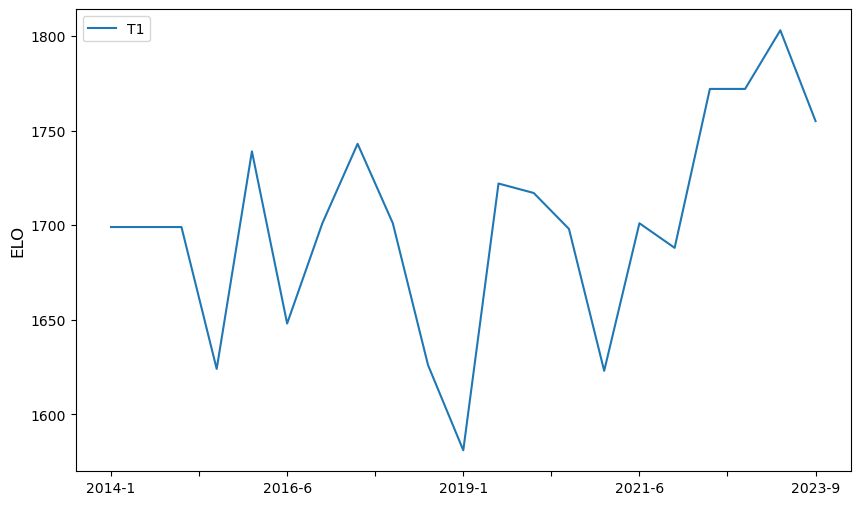

In [82]:
plot_players(['T1'])

In [54]:
llist = df[["blue_side_team","red_side_team"]].values.tolist()

In [55]:
df['teams'] = [sorted(l) for l in llist]

In [56]:
col = ['teams']
df = df.loc[((df[col].shift() != df[col])).any(axis=1)]

In [57]:
df = df.drop(df[df['n_games'] == 0].index)

In [68]:
df.loc[df['red_side_team'] == 'DWG KIA' , 'red_side_team'] = 'Dplus KIA'
df.loc[df['blue_side_team'] == 'DWG KIA' , 'blue_side_team'] = 'Dplus KIA'
df.loc[df['red_side_team'] == 'DAMWON Gaming' , 'red_side_team'] = 'Dplus KIA'
df.loc[df['blue_side_team'] == 'DAMWON Gaming' , 'blue_side_team'] = 'Dplus KIA'

In [70]:
df.loc[df['red_side_team'] == 'SK Telecom T1' , 'red_side_team'] = 'T1'
df.loc[df['blue_side_team'] == 'SK Telecom T1' , 'blue_side_team'] = 'T1'
df.loc[df['red_side_team'] == 'SKTelecom T1' , 'red_side_team'] = 'T1'
df.loc[df['blue_side_team'] == 'SKTelecom T1' , 'blue_side_team'] = 'T1'

In [71]:
df

,date,league,tournament_name,blue_side_team,red_side_team,blue_side_wins,n_games,players_blue,players_red,year,month,teams
index,,,,,,,,,,,,
140,2013-09-16,world,Season 3 World Championship,GamingGear,Team SoloMid,0,1,"[Nbs, Alunir, Mazzerin, DeadlyBrother, Inspirro]","[Dyrus, TheOddOne, Reginald, WildTurtle, Xpecial]",2013,9,"[GamingGear, Team SoloMid]"
141,2013-09-16,world,Season 3 World Championship,T1,Lemondogs,1,1,"[Impact, bengi, Faker, Piglet, PoohManDu]","[Zorozero, dexter, Nukeduck, Tabzz, Mithy]",2013,9,"[Lemondogs, SK Telecom T1]"
142,2013-09-16,world,Season 3 World Championship,Team SoloMid,OMG,0,1,"[Dyrus, TheOddOne, Reginald, WildTurtle, Xpecial]","[Gogoing, LoveLing, Cool, San, bigpomelo]",2013,9,"[OMG, Team SoloMid]"
143,2013-09-16,world,Season 3 World Championship,Lemondogs,GamingGear,1,1,"[Zorozero, dexter, Nukeduck, Tabzz, Mithy]","[Nbs, Alunir, Mazzerin, DeadlyBrother, Inspirro]",2013,9,"[GamingGear, Lemondogs]"
144,2013-09-16,world,Season 3 World Championship,OMG,T1,1,1,"[Gogoing, LoveLing, Cool, San, bigpomelo]","[Impact, bengi, Faker, Piglet, PoohManDu]",2013,9,"[OMG, SK Telecom T1]"
...,...,...,...,...,...,...,...,...,...,...,...,...
46434,2023-09-09,pcs,PCS Summer Playoffs 2023,PSG Talon,CTBC Flying Oyster,3,5,"[Azhi, JunJia, Maple, Wako, Woody]","[Rest, Gemini, JimieN, Shunn, ShiauC]",2023,9,"[CTBC Flying Oyster, PSG Talon]"
46453,2023-09-09,cblol,CBLOL Split 2 Playoffs 2023,paiN Gaming,LOUD,1,4,"[Wizer, Cariok, dyNquedo, Bvoy, ProDelta]","[Robo, Croc, Tinowns, Route, Ceos]",2023,9,"[LOUD, paiN Gaming]"
46483,2023-09-09,vcs,VCS Summer Playoffs 2023,Team Whales,GAM Esports,1,4,"[Sparda, BeanJ, Gloryy, Artemis, CBL]","[Kiaya, Levi, Kati, Slayder, Palette]",2023,9,"[GAM Esports, Team Whales]"


In [94]:
%%time

for index, game in df.iterrows():
    
    elo_blue_side, elo_red_side, ELO_players= get_elo(game['league'], game['players_blue'], game['players_red'], ELO_players, new_leagues)
    
    n_games = game['n_games']
    result_blue_side = game['blue_side_wins']
    blue_wins = result_blue_side / n_games
    k = 30 + 50 * (n_games > 4)
    elo_change_blue, elo_change_red = elo_calc_series(elo_blue_side, elo_red_side, k, blue_wins)

    ELO_teams = change_ELO_teams(elo_blue_side + elo_change_blue, game['blue_side_team'], ELO_teams)
    ELO_teams = change_ELO_teams(elo_red_side + elo_change_red, game['red_side_team'], ELO_teams)
    ELO_players = elo_change(elo_change_blue, elo_change_red, ELO_players, game['players_blue'], game['players_red'])
    
    if (game['month'] == 1 or game['month'] == 6) and  f"{game['year']}-{game['month']}" not in ELO_players.columns:
        ELO_players[f"{game['year']}-{game['month']}"] = ELO_players['ELO']
        ELO_teams[f"{game['year']}-{game['month']}"] = ELO_teams['ELO']
        print(f"Reached {game['year']}-{game['month']}")

140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
184
187
189
191
196
200
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
3980
3981
3982
3983
3984
3985
3986
3987
4250
4251
4252
4253
4254
4255
4256
4257
3988
3989
3990
3991
3992
3993
3994
3995
4258
4259
4260
4261
4262
4263
4264
4265
3996
3997
3998
3999
4000
4001
4002
4003
4266
4267
4268
4269
4270
4271
4272
4273
4004
4005
4006
4007
4008
4009
4010
4011
4274
4275
4276
4277
4278
4279
4280
4281
4012
4013
4014
4015
4016
4017
4018
4019
4282
4283
4284
4285
4286
4287
4288
4289
4020
4021
4022
4023
4024
4025
4026
4027
4290
4291
4292
4293
4294
4295
4296
4297
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4044
404

KeyboardInterrupt: 

In [26]:
def elo_calc_series(r_a, r_b, k, r):
    
    e_a = 1 / (1 + pow(10, ((r_b - r_a)/400)))
    e_b = 1 / (1 + pow(10, ((r_a - r_b)/400)))
    
    change_a = int(k * (r - e_a))
    change_b = int(k * (1 - r - e_b))
    
    return change_a, change_b

In [100]:
ELO_players = pd.DataFrame(columns = ['handle', 'ELO'])
ELO_teams = pd.DataFrame(columns = ['name', 'ELO'])

In [101]:
%%time

for index, game in df.iterrows():
    

    elo_blue_side, elo_red_side,ELO_teams = get_elo_series(game['league'], game['blue_side_team'],game['red_side_team'], ELO_teams, new_leagues)
    
    n_games = game['n_games']
    result_blue_side = game['blue_side_wins']
    blue_wins = result_blue_side / n_games
    k = 30 + 70 * (n_games > 4)
    elo_change_blue, elo_change_red = elo_calc_series(elo_blue_side, elo_red_side, k, blue_wins)

    ELO_teams = elo_change_teams(elo_change_blue, elo_change_red, ELO_teams, game['blue_side_team'], game['red_side_team'] )
    
    if (game['month'] == 1 or game['month'] == 6) and  f"{game['year']}-{game['month']}" not in ELO_teams.columns:
        ELO_teams[f"{game['year']}-{game['month']}"] = ELO_teams['ELO']
        print(f"Reached {game['year']}-{game['month']}")

Reached 2014-1
Reached 2014-6
Reached 2015-1
Reached 2015-6
Reached 2016-1
Reached 2016-6
Reached 2017-1
Reached 2017-6
Reached 2018-1
Reached 2018-6
Reached 2019-1
Reached 2019-6
Reached 2020-1
Reached 2020-6
Reached 2021-1
Reached 2021-6
Reached 2022-1
Reached 2022-6
Reached 2023-1
Reached 2023-6
CPU times: user 2min 48s, sys: 640 ms, total: 2min 49s
Wall time: 3min 19s


In [88]:
def get_elo_series(league, blue_side_team, red_side_team, ELO_teams, new_leagues):
    
    if blue_side_team not in ELO_teams.values:
        ELO_teams = start_elo_teams(blue_side_team, league, ELO_teams, new_leagues)
    elo_blue_side = ELO_teams.loc[ELO_teams['name'] == blue_side_team]['ELO'].item()
    if red_side_team not in ELO_teams.values:
        ELO_teams = start_elo_teams(red_side_team, league, ELO_teams, new_leagues)
    elo_red_side = ELO_teams.loc[ELO_teams['name'] == red_side_team]['ELO'].item()    
        
    return elo_blue_side, elo_red_side, ELO_teams

In [97]:
def start_elo_teams(team_name, league, ELO_teams, new_leagues):
    ELO = new_leagues.loc[new_leagues['slug'] == league]['ELO'].item()
    elot = pd.DataFrame({'name': [team_name], 'ELO':[ELO]})
    ELO_teams = pd.concat([ELO_teams, elot], ignore_index=True)
    return ELO_teams

In [90]:
def elo_change_teams(elo_change_blue, elo_change_red, ELO_teams, team_blue_side, team_red_side):
    elo = ELO_teams.loc[ELO_teams['name'] == team_blue_side]['ELO'].item()
    new_elo = elo + elo_change_blue
    ELO_teams.loc[ELO_teams['name'] == team_blue_side, 'ELO'] = new_elo
    
    elo = ELO_teams.loc[ELO_teams['name'] == team_red_side]['ELO'].item()
    new_elo = elo + elo_change_red
    ELO_teams.loc[ELO_teams['name'] == team_red_side, 'ELO'] = new_elo
    return ELO_teams